In [1]:
# Image comparison with deep learning for iHSPRec Paper
# We use Python for the version, refer to the read me for Java version of the deep learning model
# Author: Abdulrauf Aremu Gidado
# Year: January, 2024

In [2]:
# Importing required libraries
#import tensorflow as tf
#import tensorflow_hub as hub
#from PIL import Image
#import numpy as np

import numpy as np 
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

2024-01-26 22:49:19.021099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's architecture.
vgg16.summary()


2024-01-26 22:49:24.871434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [6]:
def load_image(image_path):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """

    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

In [7]:
def get_image_embeddings(object_image : image):
    
    """
      -----------------------------------------------------
      convert image into 3d array and add additional dimension for model input
      -----------------------------------------------------
      return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [8]:
def get_similarity_score(first_image : str, second_image : str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """

    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

In [9]:
def show_image(image_path):
  image = mpimg.imread(image_path)
  imgplot = plt.imshow(image)
  plt.show()

In [10]:
# define the path of the images
#sunflower = 'A_sunflower.jpg'
#helianthus = 'helianthus.jpeg'
#tulip = 'tulip.jpeg'

# use the show_image function to plot the images
#show_image(sunflower), show_image(helianthus)

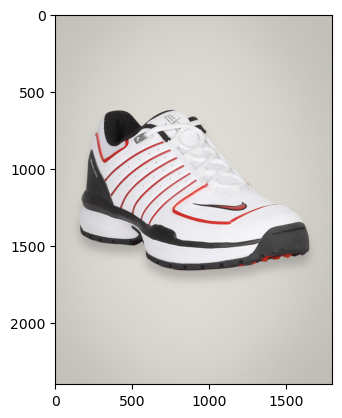

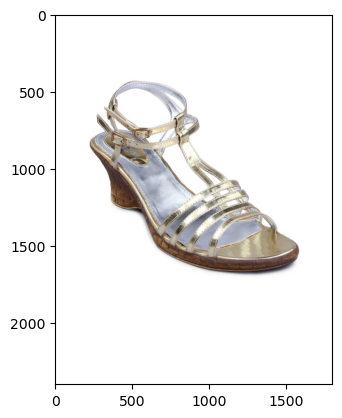

(None, None)

In [11]:
# define the path of the images
shoe1 = '1637.jpg'
shoe3 = '1653.jpg'
shoe2 = '2628.jpg'

# use the show_image function to plot the images
show_image(shoe1), show_image(shoe2)

In [12]:
#similarity_score = get_similarity_score(sunflower, helianthus)
similarity_score = get_similarity_score(shoe1, shoe2)
similarity_score

1/1 [==============================] - 0s 115ms/step


array([0.5844153], dtype=float32)

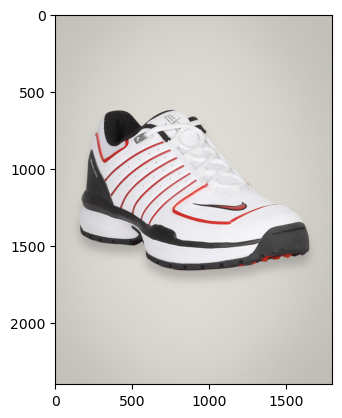

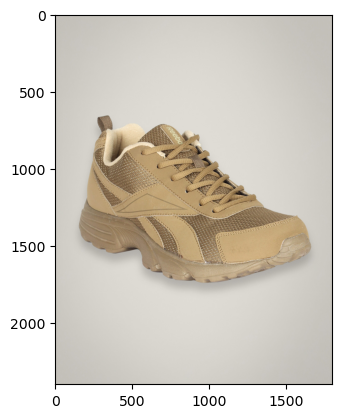

(None, None)

In [13]:
show_image(shoe1), show_image(shoe3)

In [14]:
similarity_score = get_similarity_score(shoe1, shoe3)
similarity_score

1/1 [==============================] - 0s 109ms/step


array([0.65475965], dtype=float32)

In [ ]:
#